In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
# SELECCIÓN DEL MODELO Y ENTRENAMIENTO

# Lectura del dataset

dataset = pd.read_csv('C:/Users/toled/OneDrive/Documentos/MATEMÁTICAS/TFG/Dataset NBA.csv',sep=";", encoding="ISO 8859-1")
dataset = dataset.drop('YEAR', 1)
dataset = dataset.drop('Team', 1)
dataset = dataset.drop('Arena', 1)
dataset = dataset.drop('G', 1)
dataset = dataset.drop('MP', 1)
dataset = dataset.drop('Attend.', 1)
dataset = dataset.drop('L%', 1)
dataset = dataset.drop('PW', 1)
dataset = dataset.drop('PL', 1)


dataset.head()

C:\Users\toled\AppData\Local\Temp/ipykernel_2936/2409896806.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dataset = dataset.drop('YEAR', 1)
C:\Users\toled\AppData\Local\Temp/ipykernel_2936/2409896806.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dataset = dataset.drop('Team', 1)
C:\Users\toled\AppData\Local\Temp/ipykernel_2936/2409896806.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dataset = dataset.drop('Arena', 1)
C:\Users\toled\AppData\Local\Temp/ipykernel_2936/2409896806.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dataset = dataset.drop('G', 1)
C:\Users\toled\AppData\Local\Temp/ipykernel_2936/2409896806.py:10: Fut

,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,...,TS%,OFeFG%,OfTOV%,ORB%,Of FT/FGA,DEFeFG%,DefTOV%,DRB%,Def FT/FGA,Champion
0,41.5,88.3,47.0,12.9,34.4,37.4,28.6,53.9,53.1,18.1,...,58.1,54.3,10.8,23.0,205,54.3,11.5,76.9,177,0
1,41.7,85.6,48.7,1.5,5.0,30.2,40.2,80.6,49.8,23.7,...,54.7,49.6,13.5,36.3,277,50.9,14.0,65.5,254,0
2,42.6,91.2,46.7,2.6,8.2,31.3,40.0,83.0,48.2,18.5,...,51.9,48.1,13.0,33.6,203,49.7,13.2,68.3,209,0
3,34.9,78.5,44.4,4.9,13.9,35.2,30.0,64.5,46.4,19.4,...,52.7,47.6,15.7,27.9,248,46.9,12.1,70.4,222,0
4,42.0,86.8,48.4,0.9,2.9,31.1,41.1,84.0,49.0,21.7,...,53.6,48.9,15.3,32.5,250,48.5,15.2,63.8,249,0


In [3]:
X = dataset

sc = MinMaxScaler()
sc.fit(X)
X = sc.transform(X)

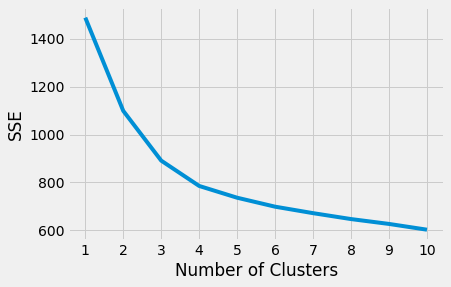

In [4]:
In [13]: kmeans_kwargs = {
   ...:     "init": "random",
   ...:     "n_init": 10,
   ...:     "max_iter": 300,
   ...:     "random_state": 42,
   ...: }
   ...:
   ...: # A list holds the SSE values for each k
   ...: sse = []
   ...: for k in range(1, 11):
   ...:     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
   ...:     kmeans.fit(X)
   ...:     sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [5]:
KMEANS = KMeans(n_clusters=4).fit(X)

In [12]:
dataset.columns

Index(['FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Rk', 'Age', 'W%', 'MOV', 'SOS', 'ORtg', 'DRtg', 'Pace', 'FTr', '3PAr',
       'TS%', 'OFeFG%', 'OfTOV%', 'ORB%', 'Of FT/FGA', 'DEFeFG%', 'DefTOV%',
       'DRB%', 'Def FT/FGA', 'Champion'],
      dtype='object')

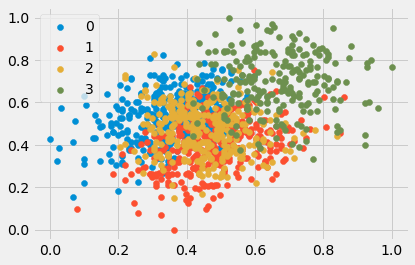

In [13]:
# OFeFG% vs DEFeFG%

label = KMEANS.fit_predict(X)
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(X[label == i , 32] , X[label == i , 36] , label = i)
plt.legend()
plt.show()

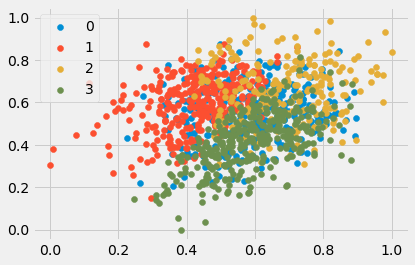

In [14]:
# OfRTG vs DefRTG

label = KMEANS.fit_predict(X)
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(X[label == i , 26] , X[label == i , 27] , label = i)
plt.legend()
plt.show()

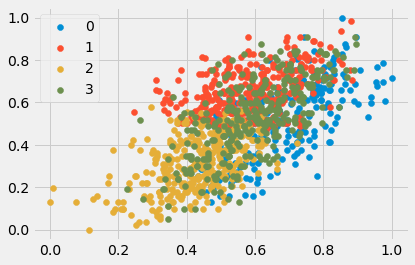

In [15]:
# OfRTG vs W%

label = KMEANS.fit_predict(X)
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(X[label == i , 26] , X[label == i , 23] , label = i)
plt.legend()
plt.show()

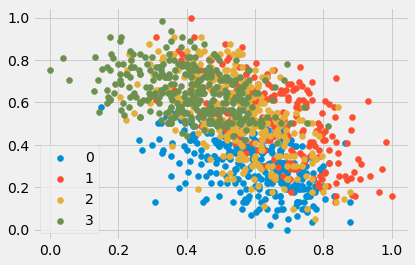

In [16]:
# DefRTG vs W%

label = KMEANS.fit_predict(X)
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(X[label == i , 27] , X[label == i , 23] , label = i)
plt.legend()
plt.show()

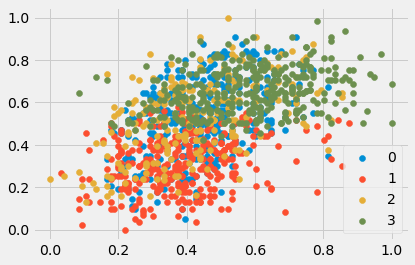

In [17]:
# Age vs W%

label = KMEANS.fit_predict(X)
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(X[label == i , 22] , X[label == i , 23] , label = i)
plt.legend()
plt.show()

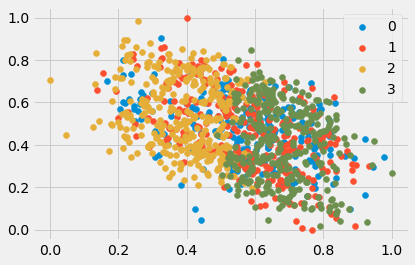

In [18]:
# MOV vs SOS

label = KMEANS.fit_predict(X)
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(X[label == i , 24] , X[label == i , 25] , label = i)
plt.legend()
plt.show()

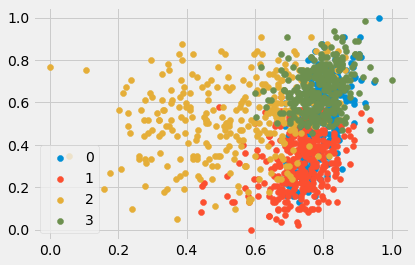

In [20]:
# 3P% vs W%

label = KMEANS.fit_predict(X)
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(X[label == i , 5] , X[label == i , 23] , label = i)
plt.legend()
plt.show()